## Dataset

## torch.utils.data.dataset

In [1]:
from torch.utils.data.dataset import Dataset
import torch
import numpy as np

* 定義一個自己的TxtDataset子類別

In [2]:
class TxtDataset(Dataset): #建立一個資料集物件
    def __init__(self):
        self.Data = np.asarray([[1,2],[3,4],[5,6],[7,8]]) #代表一段文字
        self.Label = np.asarray([[1],[2],[0],[1]]) #代表文字類別(標籤)
        
    def __getitem__(self,index):
        txt = torch.LongTensor(self.Data[index])
        label = torch.LongTensor(self.Label[index])
        return txt,label
    
    def __len__(self):
        return len(self.Data)

* 建立一個TetDataset物件 並呼叫函式

In [6]:
TxtData = TxtDataset()
print(TxtData[1])
print(TxtData.__len__())

(tensor([3, 4]), tensor([2]))
4


In [7]:
from torch.utils.data import DataLoader

In [8]:
test_loader = DataLoader(TxtData,batch_size=2,shuffle=False,num_workers=4)

In [9]:
for i,traindata in enumerate(test_loader):
    print('i:',i)
    Data,Label=traindata
    print('data:',Data)
    print('Label:',Label)

i: 0
data: tensor([[1, 2],
        [3, 4]])
Label: tensor([[1],
        [2]])
i: 1
data: tensor([[5, 6],
        [7, 8]])
Label: tensor([[0],
        [1]])


## torchvision.datsaets (For Imagefolder )

In [1]:
import torchvision.datasets as dset

In [17]:
import tqdm # 包裝迭代器，顯示進度條
import cv2
import numpy as np 
from PIL import Image 
import matplotlib.pyplot as plt
import torchvision.transforms as transforms 

>class torchvision.transforms.ToTensor <br />
功能： <br />
把shape=(H x W x C) 的畫素值為 [0, 255] 的 PIL.Image 和 numpy.ndarray
轉換成shape=(C x H x W)的畫素值範圍為[0.0, 1.0]的 torch.FloatTensor。

>class torchvision.transforms.Normalize(mean, std) <br />
功能：<br />
此轉換類作用於torch.*Tensor。給定均值(R, G, B)和標準差(R, G, B)，用公式channel = (channel - mean) / std進行規範化。

In [18]:
# 引入transforms.ToTensor()功能： range [0, 255] -> [0.0,1.0] 
transform1 = transforms.Compose([transforms.ToTensor()])
mnist = dset.MNIST(root='../data/mnist',train=True,transform=transform1,download=False)

Detail of datasets : Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data/mnist
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
> img size : torch.Size([1, 28, 28])
> target : 5
> Reshape img size : torch.Size([1, 28, 28])


Text(0.5, 1.0, '5')

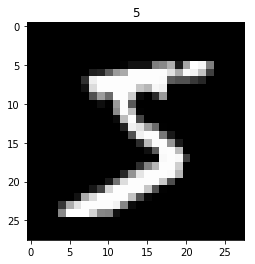

In [33]:
print('Detail of datasets : {}'.format(mnist))

img,target = mnist[0]
print('> img size : {}'.format(img.size()))
print('> target : {}'.format(target))

show_img = img.numpy()*255
show_img = show_img.reshape(28,28)
print('> Reshape img size : {}'.format(img.size()))

plt.imshow(show_img,cmap='gray')
plt.title(str(target))


## torchvision.datasets.ImageFolder

(https://www.itread01.com/content/1542309028.html)

In [ ]:
dset = dset.ImageFolder(root='root_path',transform=None,loader=default_loader)

## PIL　

In [ ]:
# PIL 讀取影象
img = Image.open(img_path).convert('RGB') # 讀取影象 
img2 = transform1(img) # 歸一化到 [0.0,1.0] 
print("img2 = ",img2) #轉化為PILImage並顯示 
img_2 = transforms.ToPILImage()(img2).convert('RGB') 
print("img_2 = ",img_2) 
img_2.show()